In [5]:
import pandas as pd
import numpy as np

ratingsAll = pd.read_csv("ratingsGrid.csv")
ratingsAll.head()

dataArr = ratingsAll.as_matrix()
print(dataArr[0][0])

#test, train
trainArr = dataArr[:, 0:4027]
testArr = dataArr[:, 4027:]
print trainArr.shape
print testArr.shape
users_df = pd.read_csv("users_avg.csv")
movies_df = pd.read_csv("movies_avg.csv")
ratingsAll.head()

0
(3953L, 4027L)
(3953L, 2014L)


,0,1,2,3,4,5,6,7,8,9,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,4,0,4,5,...,0,4,0,0,4,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,2,2,0,0,0,0


In [6]:
import math


def findSimilarity(movie1, movie2, grid):
    users = []
    ratings1 = grid[movie1]
    ratings2 = grid[movie2]
    for ind in range(len(ratings1)):
        if(ratings1[ind] != 0 and ratings2[ind] != 0):
            users.append(ind)
    difab = 0
    difas = 0
    difbs = 0
    for ind in range(len(users)):
        userID = users[ind]
        avg = users_df['Average'][userID - 1]
        rating1 = grid[movie1][userID]
        rating2 = grid[movie2][userID]
        difab += (rating1 - avg) * (rating2 - avg)
        difas += np.power(rating1 - avg, 2)
        difbs += np.power(rating2 - avg, 2)
    if (difas == 0 or difbs == 0):
        return 0

    sim = (difab) / (np.sqrt(difas * difbs))
    return sim


def knn(user, movie, K, grid, grid2):
    #all movies rated by user
    userMovies = []
    userRatings = []


    for ind in range(len(grid)):
        userRatings.append(grid[ind][user])


    for ind in range(len(userRatings)):
        if (userRatings[ind] != 0):
            userMovies.append(ind)

    simList = [0] * len(grid) 
    for ind in range(len(userMovies)):
        sim = findSimilarity(movie, userMovies[ind], grid2)
        if (user == 4530 and movie == 668 and math.isnan(sim)):
            print userMovies[ind]
        simList[userMovies[ind]] = sim
    simListSort = np.argsort(simList)[::-1]
    #if (user == 4530 and movie == 668):
           # print simList
           # print simListSort
    top = 0
    bot = 0
    for ind in range(K):
        thisSim = simList[simListSort[ind]]
        top += thisSim * grid[simListSort[ind]][user]
        bot += np.abs(thisSim)
    rating = top / bot
    return rating


In [16]:
import copy
import time

movieID = 1
userID = 2

times = []
for i in range(100, 6001, 100):
    trainSet = dataArr[:,0:i]
    tempArr = copy.copy(dataArr)
    tempArr[movieID][userID] = 0
    start = time.clock()
    for n in range(0,10):
        knn(userID, movieID, 32, tempArr, trainSet)
    end = time.clock()
    times.append((end - start) / 10)
    
print times
 
 

[0.04250694740499057, 0.1062434670708626, 0.15645374449338761, 0.2075864083495162, 0.24918123253280555, 0.3126782246222547, 0.352549816051669, 0.4418930494371125, 0.4992523644861194, 0.5300766977720969, 0.5939289943631365, 0.6551320401686326, 0.7631155953452435, 0.7937716909036453, 0.8812161906115307, 0.8901829614892677, 0.9626807114774237, 1.0120051552903078, 1.0736357428197152, 1.1505379107258478, 1.2598920389054684, 1.6164098100516184, 1.486845049184467, 1.4622291696271987, 1.6820502739487893, 1.4829147916567762, 1.6027283564650587, 1.5536598613677142, 1.681069505628966, 1.729096995247346, 1.9611848483412815, 1.8249408286359539, 1.846520376423041, 1.816125203290585, 1.8914796393665256, 2.0158416623245556, 1.9719259706630055, 2.038239819683258, 2.1788460991900136, 2.238283833072819, 2.3262633619124244, 2.2786830325423124, 2.3614765209290454, 2.4868392859962114, 2.556245124974339, 2.8949665656135037, 2.9960175974610594, 2.9291232059115826, 2.7817697329986, 2.7235885320449142, 2.863285

#[0.04250694740499057, 0.1062434670708626, 0.15645374449338761, 0.2075864083495162, 0.24918123253280555, 0.3126782246222547, 0.352549816051669, 0.4418930494371125, 0.4992523644861194, 0.5300766977720969, 0.5939289943631365, 0.6551320401686326, 0.7631155953452435, 0.7937716909036453, 0.8812161906115307, 0.8901829614892677, 0.9626807114774237, 1.0120051552903078, 1.0736357428197152, 1.1505379107258478, 1.2598920389054684, 1.6164098100516184, 1.486845049184467, 1.4622291696271987, 1.6820502739487893, 1.4829147916567762, 1.6027283564650587, 1.5536598613677142, 1.681069505628966, 1.729096995247346, 1.9611848483412815, 1.8249408286359539, 1.846520376423041, 1.816125203290585, 1.8914796393665256, 2.0158416623245556, 1.9719259706630055, 2.038239819683258, 2.1788460991900136, 2.238283833072819, 2.3262633619124244, 2.2786830325423124, 2.3614765209290454, 2.4868392859962114, 2.556245124974339, 2.8949665656135037, 2.9960175974610594, 2.9291232059115826, 2.7817697329986, 2.7235885320449142, 2.863285846241297, 2.8199128021726665, 2.8985597161037733, 3.0340002447381265, 3.173628400675807, 3.0532416354823, 3.1856450823425346, 3.2761683482544415, 3.594120837478113, 3.71484838078095]

#[0.06206128716466992, 0.15326200401054849, 0.21224073547755323, 0.42201747114459065, 0.5732626750666896, 0.7451282506749977, 0.8068032068589673, 0.8955872925646873, 0.8908312806909635, 0.9069853393964877, 0.9920368133516604, 1.3668735493344684, 1.554850749214438, 1.6283021489586644, 1.6440856662403802, 1.8649355391344216, 2.0673813414807682, 2.031712535329143, 2.2177812514802553, 2.4160481502534368, 2.433629782262005, 2.3592178248306483, 2.4328639098100213, 2.502831225427508, 2.7384847157090464, 2.809994078916179, 3.034091389954665, 3.2060157027141942, 3.0573211043215904, 3.31572043800229]

In [18]:
times2 = []
for i in range(100, 3001, 100):
    trainSet = dataArr[0:i, :]
    tempArr = copy.copy(trainSet)
    tempArr[movieID][userID] = 0
    start = time.clock()
    for n in range(0,10):
        knn(userID, movieID, 32, tempArr, trainSet)
    end = time.clock()
    times2.append((end - start) / 10)
    
print times2

[0.06206128716466992, 0.15326200401054849, 0.21224073547755323, 0.42201747114459065, 0.5732626750666896, 0.7451282506749977, 0.8068032068589673, 0.8955872925646873, 0.8908312806909635, 0.9069853393964877, 0.9920368133516604, 1.3668735493344684, 1.554850749214438, 1.6283021489586644, 1.6440856662403802, 1.8649355391344216, 2.0673813414807682, 2.031712535329143, 2.2177812514802553, 2.4160481502534368, 2.433629782262005, 2.3592178248306483, 2.4328639098100213, 2.502831225427508, 2.7384847157090464, 2.809994078916179, 3.034091389954665, 3.2060157027141942, 3.0573211043215904, 3.31572043800229]


In [14]:
import copy
import time
movieID = 1
userID = 2
times3 = []
for i in range(6000, 9001, 100):
    trainSet = dataArr[0:i, 0:i]
    tempArr = copy.copy(trainSet)
    tempArr[movieID][userID] = 0
    start = time.clock()
    knn(userID, movieID, 32, tempArr, trainSet)
    end = time.clock()
    times3.append(end - start)
    print 'i: ', i, ' time: ', end - start
print times3

i:  6000  time:  4.21630697413
i:  6100  time:  3.90096280732
i:  6200  time:  4.10606551637
i:  6300  time:  4.0370687331
i:  6400  time:  4.25037371892
i:  6500  time:  3.7153357194
i:  6600  time:  3.83828855483
i:  6700  time:  3.88830471938
i:  6800  time:  3.79098108767
i:  6900  time:  3.59731869747
i:  7000  time:  3.6686918081
i:  7100  time:  3.93254743477


KeyboardInterrupt: 

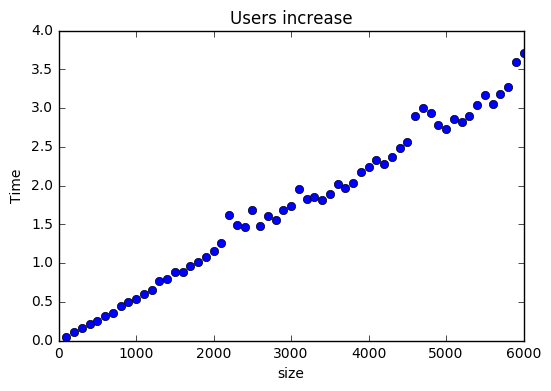

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
times = [0.04250694740499057, 0.1062434670708626, 0.15645374449338761, 0.2075864083495162, 
         0.24918123253280555, 0.3126782246222547, 0.352549816051669, 0.4418930494371125, 
         0.4992523644861194, 0.5300766977720969, 0.5939289943631365, 0.6551320401686326, 
         0.7631155953452435, 0.7937716909036453, 0.8812161906115307, 0.8901829614892677, 
         0.9626807114774237, 1.0120051552903078, 1.0736357428197152, 1.1505379107258478, 
         1.2598920389054684, 1.6164098100516184, 1.486845049184467, 1.4622291696271987, 
         1.6820502739487893, 1.4829147916567762, 1.6027283564650587, 1.5536598613677142, 
         1.681069505628966, 1.729096995247346, 1.9611848483412815, 1.8249408286359539, 
         1.846520376423041, 1.816125203290585, 1.8914796393665256, 2.0158416623245556, 
         1.9719259706630055, 2.038239819683258, 2.1788460991900136, 2.238283833072819, 
         2.3262633619124244, 2.2786830325423124, 2.3614765209290454, 2.4868392859962114, 
         2.556245124974339, 2.8949665656135037, 2.9960175974610594, 2.9291232059115826, 
         2.7817697329986, 2.7235885320449142, 2.863285846241297, 2.8199128021726665, 
         2.8985597161037733, 3.0340002447381265, 3.173628400675807, 3.0532416354823, 
         3.1856450823425346, 3.2761683482544415, 3.594120837478113, 3.71484838078095]

times2 = [0.06206128716466992, 0.15326200401054849, 0.21224073547755323, 0.42201747114459065, 
          0.5732626750666896, 0.7451282506749977, 0.8068032068589673, 0.8955872925646873, 
          0.8908312806909635, 0.9069853393964877, 0.9920368133516604, 1.3668735493344684, 
          1.554850749214438, 1.6283021489586644, 1.6440856662403802, 1.8649355391344216, 
          2.0673813414807682, 2.031712535329143, 2.2177812514802553, 2.4160481502534368, 
          2.433629782262005, 2.3592178248306483, 2.4328639098100213, 2.502831225427508, 
          2.7384847157090464, 2.809994078916179, 3.034091389954665, 3.2060157027141942, 
          3.0573211043215904, 3.31572043800229]


plt.plot(range(100, 6001, 100), times, 'o')
plt.ylabel('Time')
plt.xlabel('size')
plt.title('Users increase')
plt.show()

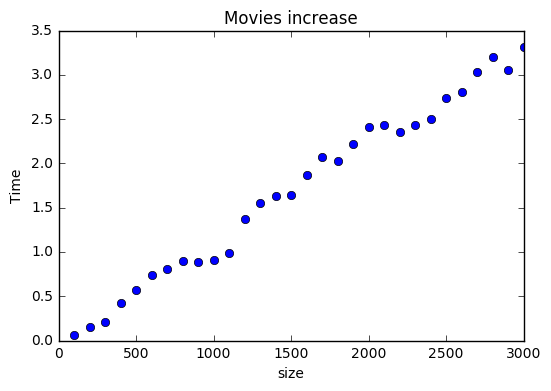

In [4]:
plt.plot(range(100, 3001, 100), times2, 'o')
plt.ylabel('Time')
plt.xlabel('size')
plt.title('Movies increase')
plt.show()

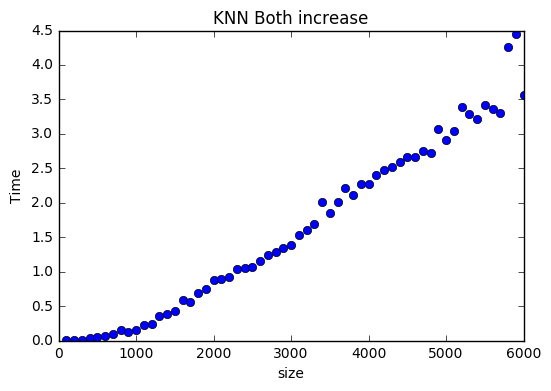

In [15]:
times3 = [0.0009355308703433707, 0.008205039945586634, 0.011004527258883456, 
 0.03724083919882304, 0.04386100300751394, 0.06540623947774549, 
 0.09764968592610757, 0.14844980166350297, 0.12981102671157885, 
 0.14738321752355432, 0.22182384308976566, 0.2331575824777019, 
 0.3527555331519352, 0.3849997690778224, 0.42584023106428504, 
 0.5916395908769516, 0.5526690064148951, 0.6891645393536763, 
 0.7531540614079333, 0.8833037739788949, 0.8870727396962295, 
 0.9273321462222839, 1.039989799950348, 1.0508731424087117, 
 1.060541478951933, 1.1573464239233857, 1.247539099861413, 
 1.2838104606561842, 1.3498167030550121, 1.383103444056232, 1.5346807609458182, 
 1.603700044329159, 1.6891325655138019, 2.0136761192126755, 1.8559669303653124, 
 2.0074088518588837, 2.2090220702390297, 2.115970301434359, 2.2672961697313525,
 2.278573856214834, 2.402465380423564, 2.470960450728512, 2.5151636922443004, 
 2.592183540893558, 2.6570667515091912, 2.664115996354198, 2.744146912294184, 
 2.7223561483128265, 3.064781762753327, 2.9050621693816225, 3.0376411043053793,
 3.3886846554384533, 3.2835653278838492, 3.2132698540769127, 3.424641804177213,
 3.356785815930948, 3.2977332915962734, 4.267324590922328, 4.442009915048288, 3.564332352670675]

plt.plot(range(100, 6001, 100), times3, 'o')
plt.ylabel('Time')
plt.xlabel('size')
plt.title('KNN Both increase')
plt.show()